In [28]:
# read necessary libraries and dataset

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42) # Mersenne twister Pseudorandom generator

full = pd.read_csv("coffee_dataset.csv") 
part = full.sample(200)

In [2]:
# print shape of dataset
full.shape

(2974, 4)

In [3]:
# print shape of sample
part.shape

(200, 4)

In [4]:
# print first 5 rows of the data
full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [5]:
# print first 5 rows of sampe
part.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [6]:
part.drinks_coffee .mean() # drink coffee

0.595

In [16]:
1- part['drinks_coffee'].mean() #don't drink coffee

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [19]:
part[ part["drinks_coffee"]  == False ]['height'].mean()

66.78492279927877

`3` Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [22]:
bootsamp = part.sample(200 , replace= True)

In [23]:
bootsamp['drinks_coffee'].mean() #drinks coffee

0.65

In [25]:
1- bootsamp['drinks_coffee'].mean() #don't drink coffee

0.35

 `4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample.  Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

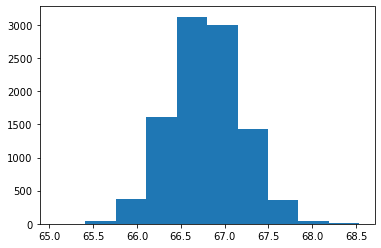

In [30]:
boot_means = []
for i in range(10000):
    bootsamp = part.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means)  # Looks pretty normal
plt.show()

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [31]:
print(np.percentile(boot_means, 2.5) , np.percentile(boot_means, 97.5))

66.00553304554546 67.5973045839486
